<a href="https://colab.research.google.com/github/UTPAL14641/Anamoly_Experiment/blob/main/Generative_LSTM_for_anomaly_detection_in_multivariate_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
base_folder = '/content/drive/MyDrive/Data'

In [ ]:
condition = {'healthy': 0, 'vertical': 1, 'imbalance': 2, 'horizontal': 3}

In [ ]:
datah = []

In [ ]:
for data_file in os.listdir(base_folder):
  l = data_file.split('_')
  file_path = os.path.join(base_folder, data_file)
  df = pd.read_csv(file_path, names = ['s1', 's2', 's3', 's4', 's5', 's6','s7', 's8'])
  if 'healthy' in data_file:
    df['condition'] = 0
  else:
    df['condition'] = condition[l[0]]

  for ind in df.index:
    datah.append([df['s1'][ind], df['s2'][ind], df['s3'][ind], df['s4'][ind], df['s5'][ind], df['s6'][ind], df['s7'][ind] ,df['s8'][ind] ,df['condition'][ind]])

In [ ]:
df = pd.DataFrame(datah,  columns=(['s1', 's2', 's3', 's4', 's5', 's6','s7', 's8', 'condition']))

In [ ]:
df.head()

,s1,s2,s3,s4,s5,s6,s7,s8,condition
0,4.5595,0.175200,0.287210,-0.017751,-0.41565,0.032459,-0.11218,-0.128140,0
1,4.6038,-0.051295,-0.194050,-0.060071,-0.41809,0.036547,-0.11043,0.118310,0
2,4.5703,-0.969080,0.038033,-0.028329,-0.43081,0.041924,-0.14331,-0.071527,0
3,4.5870,0.891270,0.072973,0.007453,-0.40017,0.041090,-0.11984,0.043445,0
4,4.5887,-1.716000,-0.329290,-0.033063,-0.50281,0.040474,-0.25270,0.023901,0


In [ ]:
# df.to_csv('btp.csv')

In [ ]:
# Load the data into a pandas DataFrame
data = df

# Separate the features and target variable
X = data[['s2', 's3', 's4', 's5', 's6', 's7', 's8']]
y = data['condition']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have loaded your time series data into 'X_train' and 'X_test'

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (assuming each sequence has a fixed length)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [ ]:
df = data

In [ ]:
df = df.drop(columns=['s1'], axis=1)

In [ ]:
df.head()

,s2,s3,s4,s5,s6,s7,s8,condition
0,0.175200,0.287210,-0.017751,-0.41565,0.032459,-0.11218,-0.128140,0
1,-0.051295,-0.194050,-0.060071,-0.41809,0.036547,-0.11043,0.118310,0
2,-0.969080,0.038033,-0.028329,-0.43081,0.041924,-0.14331,-0.071527,0
3,0.891270,0.072973,0.007453,-0.40017,0.041090,-0.11984,0.043445,0
4,-1.716000,-0.329290,-0.033063,-0.50281,0.040474,-0.25270,0.023901,0


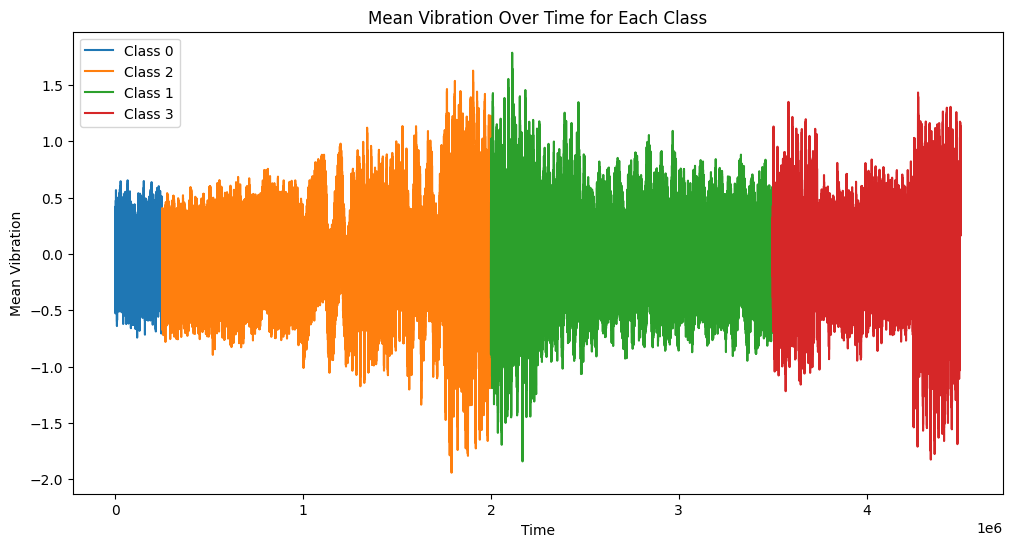

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Calculate vibration severity metrics
severity_metrics = df.groupby('condition').agg(['mean', 'std'])

# # Step 2: Visualize severity using box plots or violin plots
# fig, axes = plt.subplots(1, 7, figsize=(20, 5), sharey=True)
# for i, col in enumerate(df.columns[:-1]):  # Exclude 'output_class'
#     sns.boxplot(x='condition', y=col, data=df, ax=axes[i])
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

# Optionally, you can also plot time series data
plt.figure(figsize=(12, 6))
for cls in df['condition'].unique():
    class_data = df[df['condition'] == cls].drop(columns='condition')
    plt.plot(class_data.mean(axis=1), label=f'Class {cls}')
plt.xlabel('Time')
plt.ylabel('Mean Vibration')
plt.title('Mean Vibration Over Time for Each Class')
plt.legend()
plt.show()



In [ ]:
# Handle missing values
df = df.dropna()  # or use appropriate imputation techniques

# Normalize or scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['s2', 's3', 's4', 's5', 's6', 's7', 's8']] = scaler.fit_transform(df[['s2', 's3', 's4', 's5', 's6', 's7', 's8']])

# Split data into train, validation, and test sets
from sklearn.model_selection import train_test_split
X = df[['s2', 's3', 's4', 's5', 's6', 's7', 's8']]
y = df['condition']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
# Check if GPU is available
if tf.test.is_gpu_available():
    print("GPU is available")
    # Allow memory growth to prevent GPU memory allocation errors
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU is not available")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU is available


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)

# Define the LSTM encoder-decoder model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam

# Preprocess data
data = df
features = data.drop('condition', axis=1)
labels = data['condition']

# Convert data to time series sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 1
batch_size = 128
X, y = create_sequences(features.values, sequence_length)

# LSTM Encoder-Decoder as Generator
latent_dim = 64

encoder_inputs = Input(shape=(sequence_length, features.shape[1]))
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, latent_dim))
decoder_lstm = LSTM(features.shape[1], return_sequences=True, return_state=True)  # Change output dimension
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

generator = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Discriminator
discriminator_input = Input(shape=(None, features.shape[1]))
discriminator_lstm = LSTM(64, return_sequences=True)(discriminator_input)
discriminator_lstm = BatchNormalization()(discriminator_lstm)
discriminator_lstm = Dropout(0.2)(discriminator_lstm)
discriminator_lstm = LSTM(32, return_sequences=False)(discriminator_lstm)
discriminator_lstm = BatchNormalization()(discriminator_lstm)
discriminator_lstm = Dropout(0.2)(discriminator_lstm)
discriminator_output = Dense(1, activation='sigmoid')(discriminator_lstm)
discriminator = Model(discriminator_input, discriminator_output)

# GAN
discriminator.trainable = False
gan_input = Input(shape=(sequence_length, features.shape[1]))
dummy_decoder_input = tf.zeros((batch_size, sequence_length, latent_dim))
gan_output = discriminator(generator([gan_input, dummy_decoder_input]))
gan = Model(gan_input, gan_output)

# Train GAN
batch_size = 32
epochs = 100

disc_losses = []
disc_accuracies = []
gen_losses = []

for epoch in range(epochs):
    # Train Discriminator
    X_real = X[np.random.choice(X.shape[0], batch_size, replace=False)]
    y_real = np.ones(batch_size)
    X_fake = generator.predict([X_real, dummy_decoder_input])  # No need for reshaping
    y_fake = np.zeros(batch_size)
    X_disc = np.concatenate([X_real, X_fake])
    y_disc = np.concatenate([y_real, y_fake])
    discriminator.trainable = True
    disc_loss, disc_acc = discriminator.train_on_batch(X_disc, y_disc)
    disc_losses.append(disc_loss)
    disc_accuracies.append(disc_acc)

    # Train Generator
    X_gen = X[np.random.choice(X.shape[0], batch_size, replace=False)]
    y_gen = np.ones(batch_size)
    discriminator.trainable = False
    gen_loss = gan.train_on_batch(X_gen, y_gen)
    gen_losses.append(gen_loss)

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Discriminator Loss: {disc_loss}, Discriminator Accuracy: {disc_acc}, Generator Loss: {gen_loss}")

# Anomaly detection
reconstruction_errors = []
for i in range(len(X)):
    X_real = X[i:i+1]
    X_fake = generator.predict(X_real)
    reconstruction_error = np.mean(np.abs(X_real - X_fake))
    reconstruction_errors.append(reconstruction_error)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)  # Adjust this value based on your data
anomalies = np.array(reconstruction_errors) > threshold

# Evaluate the results
print(f"Number of anomalies detected: {np.sum(anomalies)}")


Epoch 1/10
22500/22500 [==============================] - 139s 6ms/step - loss: 0.6293 - accuracy: 0.7123 - val_loss: 0.5612 - val_accuracy: 0.7438
Epoch 2/10
22500/22500 [==============================] - 132s 6ms/step - loss: 0.5464 - accuracy: 0.7509 - val_loss: 0.5423 - val_accuracy: 0.7516
Epoch 3/10
22500/22500 [==============================] - 132s 6ms/step - loss: 0.5295 - accuracy: 0.7584 - val_loss: 0.5237 - val_accuracy: 0.7606
Epoch 4/10
22500/22500 [==============================] - 132s 6ms/step - loss: 0.5207 - accuracy: 0.7627 - val_loss: 0.5208 - val_accuracy: 0.7631
Epoch 5/10
22500/22500 [==============================] - 132s 6ms/step - loss: 0.5150 - accuracy: 0.7653 - val_loss: 0.5154 - val_accuracy: 0.7659
Epoch 6/10
22500/22500 [==============================] - 136s 6ms/step - loss: 0.5109 - accuracy: 0.7672 - val_loss: 0.5085 - val_accuracy: 0.7682
Epoch 7/10
22500/22500 [==============================] - 132s 6ms/step - loss: 0.5077 - accuracy: 0.7685 - val_

In [ ]:
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
# Evaluate the LSTM model on the test set

loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Generate classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))



22500/22500 [==============================] - 76s 3ms/step - loss: 0.5035 - accuracy: 0.7707
Test loss: 0.5035334825515747, Test accuracy: 0.7706680297851562
22500/22500 [==============================] - 55s 2ms/step
              precision    recall  f1-score   support

           0       0.55      0.52      0.54     40324
           1       0.77      0.72      0.75    239845
           2       0.78      0.81      0.80    279968
           3       0.80      0.83      0.82    159863

    accuracy                           0.77    720000
   macro avg       0.73      0.72      0.72    720000
weighted avg       0.77      0.77      0.77    720000

[[ 20923   2326   3846  13229]
 [  4491 172553  51792  11009]
 [  1436  41423 228146   8963]
 [ 10900   6773   8931 133259]]


NameError: name 'plt' is not defined

In [ ]:
history.history

{'loss': [0.6293034553527832,
  0.5464082956314087,
  0.5295364856719971,
  0.5206637382507324,
  0.5150266289710999,
  0.5109251141548157,
  0.5076788067817688,
  0.5053524374961853,
  0.5031735301017761,
  0.5014255046844482],
 'accuracy': [0.7122558951377869,
  0.7508687376976013,
  0.7584444284439087,
  0.7627485990524292,
  0.7653409838676453,
  0.7671594023704529,
  0.7685472369194031,
  0.7696604132652283,
  0.770796537399292,
  0.7713521122932434],
 'val_loss': [0.5611751675605774,
  0.5422679781913757,
  0.5237387418746948,
  0.5208103656768799,
  0.5154438018798828,
  0.5084819197654724,
  0.5103898048400879,
  0.508540153503418,
  0.5044082403182983,
  0.5051944851875305],
 'val_accuracy': [0.7438399791717529,
  0.7515722513198853,
  0.7605999708175659,
  0.7630689144134521,
  0.7659111022949219,
  0.7682044506072998,
  0.7674422264099121,
  0.768447756767273,
  0.7704366445541382,
  0.7695611119270325]}

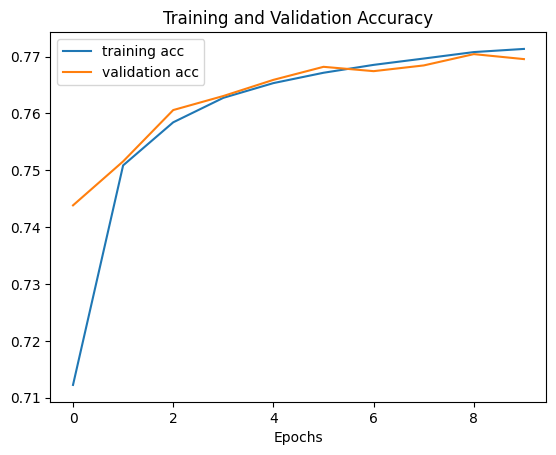

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend()

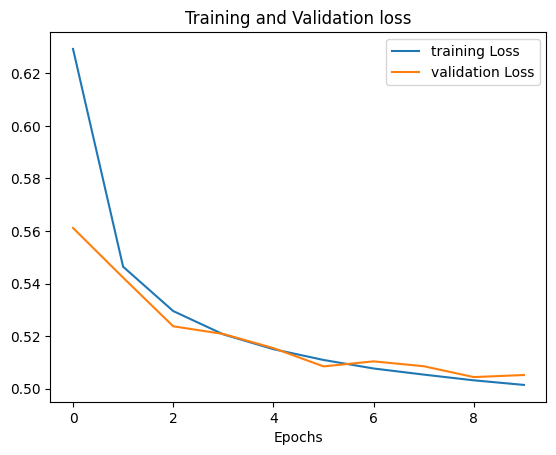

In [ ]:


plt.plot(history.history['loss'], label='training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation loss')
plt.legend()

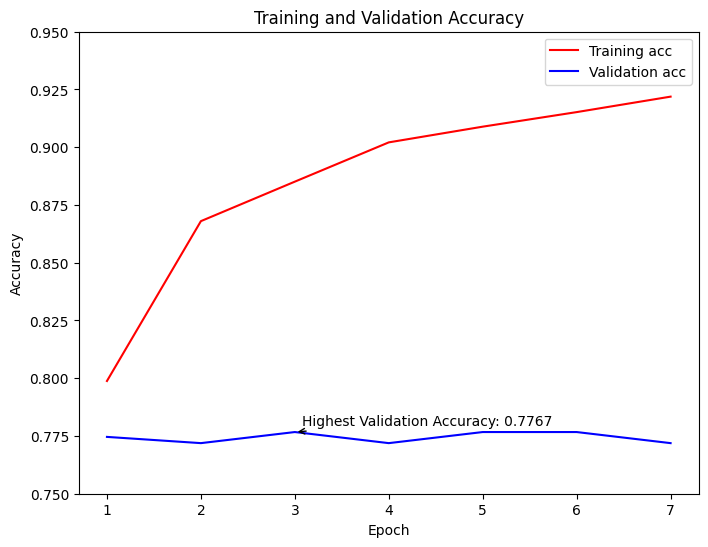

In [ ]:


# Training accuracy data
train_acc = [0.7988, 0.8680, 0.8851, 0.9021, 0.9089, 0.9152, 0.9219]

# Validation accuracy data
val_acc = [0.7746, 0.7719, 0.7767, 0.7719, 0.7767, 0.7767, 0.7719]

# Epochs
epochs = range(1, len(train_acc) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.95)
plt.xticks(epochs)
plt.legend()

# Annotate the highest validation accuracy
highest_val_acc = max(val_acc)
highest_val_acc_epoch = val_acc.index(highest_val_acc) + 1
plt.annotate(f'Highest Validation Accuracy: {highest_val_acc:.4f}', xy=(highest_val_acc_epoch, highest_val_acc), xytext=(5, 5),
             textcoords='offset points', fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.show()

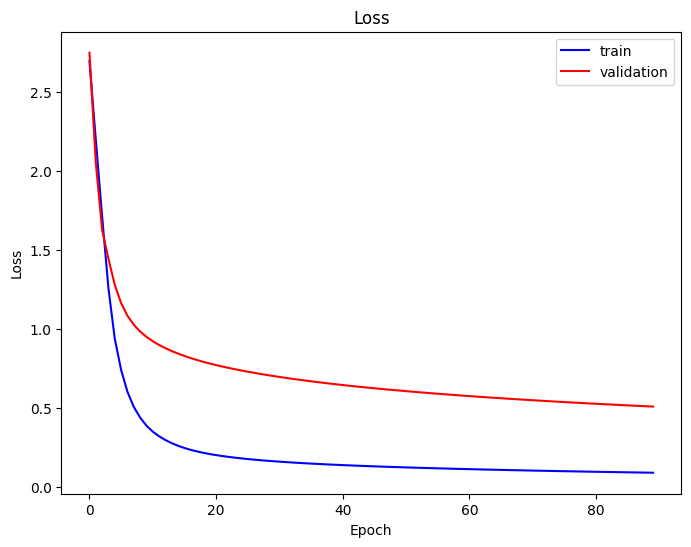

In [ ]:
import matplotlib.pyplot as plt

# Training loss data
train_loss = [2.6950, 2.1975, 1.7113, 1.2551, 0.9367, 0.7393, 0.6011, 0.5055, 0.4379, 0.3867,
              0.3488, 0.3193, 0.2954, 0.2757, 0.2592, 0.2452, 0.2334, 0.2233, 0.2145, 0.2069,
              0.2002, 0.1942, 0.1888, 0.1839, 0.1794, 0.1753, 0.1715, 0.1680, 0.1647, 0.1616,
              0.1587, 0.1560, 0.1534, 0.1510, 0.1487, 0.1465, 0.1444, 0.1424, 0.1405, 0.1387,
              0.1369, 0.1352, 0.1336, 0.1320, 0.1305, 0.1290, 0.1276, 0.1262, 0.1249, 0.1236,
              0.1223, 0.1211, 0.1199, 0.1187, 0.1176, 0.1165, 0.1154, 0.1143, 0.1133, 0.1123,
              0.1113, 0.1103, 0.1094, 0.1084, 0.1075, 0.1066, 0.1057, 0.1048, 0.1040, 0.1031,
              0.1023, 0.1015, 0.1007, 0.0999, 0.0991, 0.0984, 0.0976, 0.0969, 0.0961, 0.0954,
              0.0947, 0.0940, 0.0933, 0.0926, 0.0919, 0.0913, 0.0906, 0.0900, 0.0893, 0.0887]

# Validation loss data
val_loss = [2.7481, 2.0515, 1.6254, 1.4428, 1.2776, 1.1628, 1.0826, 1.0257, 0.9827, 0.9489,
            0.9212, 0.8977, 0.8772, 0.8590, 0.8427, 0.8279, 0.8144, 0.8021, 0.7907, 0.7801,
            0.7702, 0.7609, 0.7521, 0.7438, 0.7359, 0.7284, 0.7212, 0.7143, 0.7077, 0.7013,
            0.6952, 0.6893, 0.6836, 0.6781, 0.6727, 0.6676, 0.6626, 0.6577, 0.6530, 0.6484,
            0.6440, 0.6396, 0.6354, 0.6313, 0.6273, 0.6234, 0.6196, 0.6159, 0.6123, 0.6087,
            0.6052, 0.6018, 0.5985, 0.5952, 0.5920, 0.5888, 0.5857, 0.5827, 0.5797, 0.5768,
            0.5739, 0.5711, 0.5683, 0.5656, 0.5629, 0.5603, 0.5577, 0.5551, 0.5526, 0.5501,
            0.5477, 0.5453, 0.5429, 0.5406, 0.5383, 0.5360, 0.5338, 0.5316, 0.5294, 0.5273,
            0.5252, 0.5231, 0.5211, 0.5191, 0.5171, 0.5151, 0.5132, 0.5113, 0.5094, 0.5076]

# Epochs
epochs = range(len(train_loss))

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

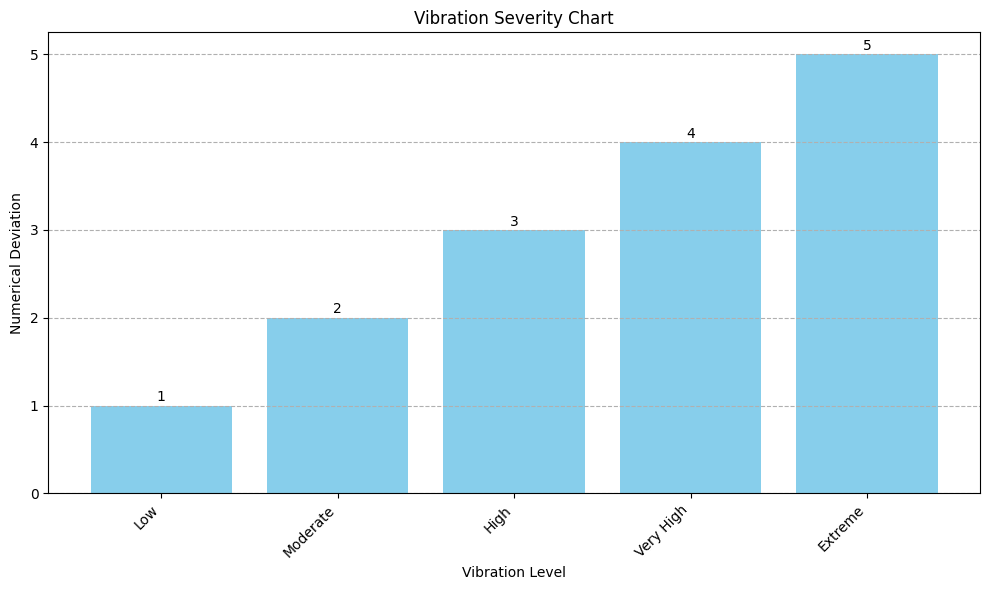

In [ ]:
import matplotlib.pyplot as plt

# Define vibration levels and corresponding severity categories
vibration_levels = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']
severity_categories = ['Noticeable', 'Tolerable', 'Concerning', 'Severe', 'Critical']

# Define numerical deviations for each severity category
numerical_deviations = [1, 2, 3, 4, 5]

# Plotting the vibration severity chart
plt.figure(figsize=(10, 6))
plt.bar(vibration_levels, numerical_deviations, color='skyblue')
plt.xlabel('Vibration Level')
plt.ylabel('Numerical Deviation')
plt.title('Vibration Severity Chart')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Annotate severity categories
for level, deviation in zip(vibration_levels, numerical_deviations):
    plt.text(level, deviation + 0.05, f'{deviation}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Example input time series data (replace this with your actual data)
time_series_data = np.random.normal(loc=0, scale=1, size=1000)

# Step 1: Preprocess the input time series data (if necessary)

# Step 2: Calculate relevant features (e.g., RMS, peak-to-peak, etc.)
rms = np.sqrt(np.mean(time_series_data**2))
peak_to_peak = np.max(time_series_data) - np.min(time_series_data)

# Step 3: Define thresholds to classify vibration levels
thresholds = {
    'Low': 0.1,
    'Moderate': 0.5,
    'High': 1.0,
    'Very High': 1.5
}

# Step 4: Map vibration levels to predefined severity categories based on calculated features
vibration_level = None
for level, threshold in thresholds.items():
    if rms < threshold:
        vibration_level = level
        break

# Define output severity categories based on vibration levels
severity_categories = {
    'Low': 'Noticeable',
    'Moderate': 'Tolerable',
    'High': 'Concerning',
    'Very High': 'Severe'
}

# Map vibration level to severity category
severity_category = severity_categories.get(vibration_level, 'Undefined')

print(f"Vibration Level: {vibration_level}")
print(f"Severity Category: {severity_category}")


Vibration Level: Very High
Severity Category: Severe
